In [2]:
from google_play_scraper import reviews_all
import pandas as pd

# Replace with the actual app ID (from the URL of the app)
app_id = 'com.moniepoint.business'  

print("Fetching reviews...")
reviews = reviews_all(
    app_id,
    sleep_milliseconds=0,
    lang='en'
)

# Slice to 5000 if more were fetched
reviews = reviews[:5000]

# Convert to DataFrame
df = pd.DataFrame(reviews)

# Keep relevant columns
df = df[['userName', 'score', 'content', 'at']]

# Save to CSV
df.to_csv('google_play_reviews.csv', index=False)
print("Saved 5000 reviews to 'google_play_reviews.csv'")


Fetching reviews...
Saved 5000 reviews to 'google_play_reviews.csv'


In [12]:
import pandas as pd
import numpy as np

In [13]:
df= pd.read_csv("google_play_reviews.csv")

In [9]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [2]:
import torch

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

c:\Users\user11\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]


In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")







c:\Users\user11\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\user11\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user11\.cache\huggingface\hub\models--nlptown--bert-base-multilingual-uncased-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, 

In [7]:

tokens = tokenizer.encode("i kind of like it though", return_tensors='pt')
result = model(tokens)
print(result)







SequenceClassifierOutput(loss=None, logits=tensor([[-1.7786,  0.0136,  1.9495,  1.1216, -1.1930]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [69]:
data = pd.read_csv("google_play_reviews.csv")

In [70]:
review = data['content']

In [71]:
review

0               Very interesting app, and easy navigation
1                          I love banking with moniepoint
2                         i love monipoint there the best
3                       super fast. and trusted I love it
4                                         I hate this app
                              ...                        
4995                                            Very okay
4996                                    Tested and tested
4997                        U are the best among the app,
4998                      I can't Open My Monei point app
4999    My app is outdated and I am finding it difficu...
Name: content, Length: 5000, dtype: object

In [72]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [73]:

from tqdm import tqdm
tqdm.pandas()

data['sentiment'] = data['content'].progress_apply(sentiment_score)


100%|██████████| 5000/5000 [06:57<00:00, 11.96it/s]


In [74]:
data.head()

,userName,score,content,at,sentiment
0,A Google user,5,"Very interesting app, and easy navigation",2025-06-08 15:29:26,5
1,A Google user,5,I love banking with moniepoint,2025-06-08 14:27:59,5
2,A Google user,1,i love monipoint there the best,2025-06-08 13:51:34,5
3,A Google user,5,super fast. and trusted I love it,2025-06-08 12:58:36,5
4,A Google user,1,I hate this app,2025-06-08 12:39:44,1


In [75]:
df=data.copy()

In [87]:
# Rename the column
df.rename(columns={'score': 'rating'}, inplace=True)

# Check to confirm
print(df.columns)

# Rename the column
df.rename(columns={'sentiment': 'sentiment score'}, inplace=True)

df.rename(columns={'at': 'date'}, inplace=True)

# Check to confirm
print(df.columns)


Index(['userName', 'rating', 'content', 'at', 'sentiment score',
       'sentiment_label'],
      dtype='object')
Index(['userName', 'rating', 'content', 'date', 'sentiment score',
       'sentiment_label'],
      dtype='object')


In [79]:

def label_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply function
df['sentiment_label'] = df['sentiment score'].apply(label_sentiment)

print(df[['sentiment score', 'sentiment_label']].head())


   sentiment score sentiment_label
0                5        positive
1                5        positive
2                5        positive
3                5        positive
4                1        negative


In [80]:
# Drop the sentiment_score column

df.head()


,userName,rating,content,at,sentiment score,sentiment_label
0,A Google user,5,"Very interesting app, and easy navigation",2025-06-08 15:29:26,5,positive
1,A Google user,5,I love banking with moniepoint,2025-06-08 14:27:59,5,positive
2,A Google user,1,i love monipoint there the best,2025-06-08 13:51:34,5,positive
3,A Google user,5,super fast. and trusted I love it,2025-06-08 12:58:36,5,positive
4,A Google user,1,I hate this app,2025-06-08 12:39:44,1,negative


C:\Users\user11\AppData\Local\Temp\ipykernel_19060\1453518714.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_df, x='sentiment_label', y='count', palette='viridis')


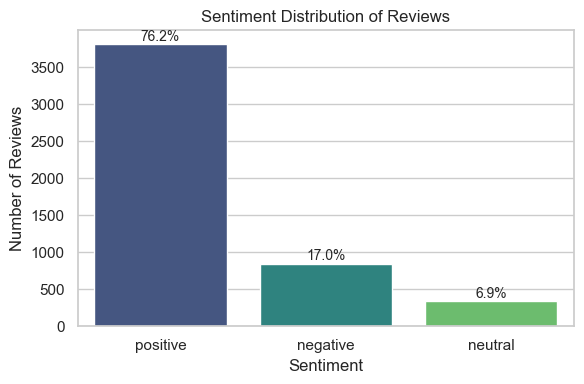

In [59]:

# Count and percentage
sentiment_counts = df['sentiment_label'].value_counts()
sentiment_percent = df['sentiment_label'].value_counts(normalize=True) * 100

# Combine into a DataFrame for easy labeling
sentiment_df = pd.DataFrame({
    'count': sentiment_counts,
    'percent': sentiment_percent
}).reset_index().rename(columns={'index': 'sentiment_label'})

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=sentiment_df, x='sentiment_label', y='count', palette='viridis')

# Annotate bars with percentages
for i, row in sentiment_df.iterrows():
    plt.text(i, row['count'] + 1, f"{row['percent']:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


In [121]:
# Case 1: High rating but negative or neutral sentiment
high_rating_mismatch = df[(df['rating'] >= 4) & (df['sentiment_label'].isin(['neutral', 'negative']))]

# Case 2: Low rating but positive or neutral sentiment
low_rating_mismatch = df[(df['rating'] <= 2) & (df['sentiment_label'].isin(['neutral', 'positive']))]

# Combine and inspect
mismatched_reviews = pd.concat([high_rating_mismatch, low_rating_mismatch])
mismatched_reviews[['rating', 'content', 'sentiment_label']]


,rating,content,sentiment_label
5,4,mfiruryr,neutral
11,5,Suleiman Saidu Rufai,neutral
42,5,instant transfer n receiving of funds,negative
48,4,Electricity bill payment isn't very reliable,negative
52,5,This app disappoints me The charges are dope Abeg make una reduce charges Make the poor breathe The app is very good 5/5,neutral
...,...,...,...
4890,1,This app is nice but stressful,neutral
4893,2,It showing upgrade,positive
4894,1,"Just updated to the new version because my old one got outdated and now the money in the other account is not in the new version.pls how do I get my money from the other account,it urgent and I need answers",positive
4906,1,BABA JIBRIN,positive


In [95]:
# Group by month
df['date'] = pd.to_datetime(df['date'])

monthly_trend = df.groupby(df['date'].dt.to_period('M')).agg({
    'rating': 'mean',
    'sentiment score': 'mean'
}).reset_index()

# Convert period to timestamp for plotting
monthly_trend['date'] = monthly_trend['date'].dt.to_timestamp()



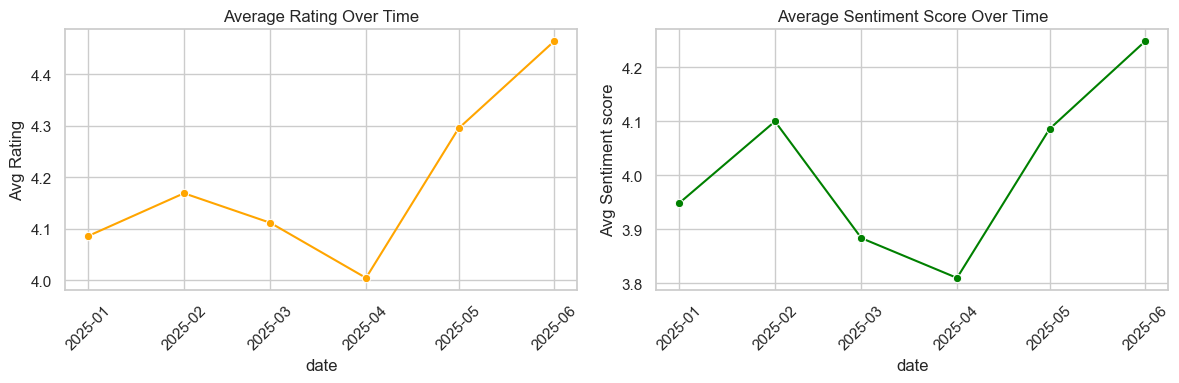

In [97]:


fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

# Average Rating
sns.lineplot(data=monthly_trend, x='date', y='rating', marker='o', ax=axes[0], color='orange')
axes[0].set_title('Average Rating Over Time')
axes[0].set_ylabel('Avg Rating')
axes[0].tick_params(axis='x', rotation=45)

# Average Sentiment Score
sns.lineplot(data=monthly_trend, x='date', y='sentiment score', marker='o', ax=axes[1], color='green')
axes[1].set_title('Average Sentiment Score Over Time')
axes[1].set_ylabel('Avg Sentiment score')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

def get_top_tfidf_words(corpus, n=20, ngram_range=(1, 1)):
    tfidf = TfidfVectorizer(stop_words='english', ngram_range=ngram_range)
    X = tfidf.fit_transform(corpus)
    tfidf_scores = X.sum(axis=0).A1
    words = tfidf.get_feature_names_out()
    tfidf_dict = dict(zip(words, tfidf_scores))
    sorted_words = sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)
    return sorted_words[:n]

positive_reviews = df[df['sentiment_label'] == 'positive']['content']
negative_reviews = df[df['sentiment_label'] == 'negative']['content']

top_pos_tfidf = get_top_tfidf_words(positive_reviews, n=20)
top_neg_tfidf = get_top_tfidf_words(negative_reviews, n=20)




In [100]:
print("Top Positive Words (TF-IDF):")
for word, score in top_pos_tfidf:
    print(f"{word}: {score:.4f}")

print("\nTop Negative Words (TF-IDF):")
for word, score in top_neg_tfidf:
    print(f"{word}: {score:.4f}")


Top Positive Words (TF-IDF):
good: 906.0599
nice: 300.5848
app: 296.7870
excellent: 188.3556
love: 158.1463
great: 147.8169
best: 141.7178
moniepoint: 93.2645
reliable: 92.0480
fast: 91.8354
awesome: 68.2107
fantastic: 63.6377
banking: 60.0936
easy: 56.1146
perfect: 55.6632
business: 50.4509
amazing: 48.7176
bank: 48.1035
like: 45.7850
use: 44.1800

Top Negative Words (TF-IDF):
app: 59.9430
account: 41.7606
bad: 32.0296
update: 30.1827
slow: 27.4306
money: 23.3021
moniepoint: 22.0802
login: 21.5910
open: 21.4290
network: 21.3412
poor: 19.5259
working: 19.3166
transfer: 16.8553
don: 16.5460
upgrade: 16.0139
access: 15.9324
opening: 15.4398
trying: 14.4187
business: 14.0331
want: 13.5705


C:\Users\user11\AppData\Local\Temp\ipykernel_19060\2902830085.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores), y=list(words), palette='crest')


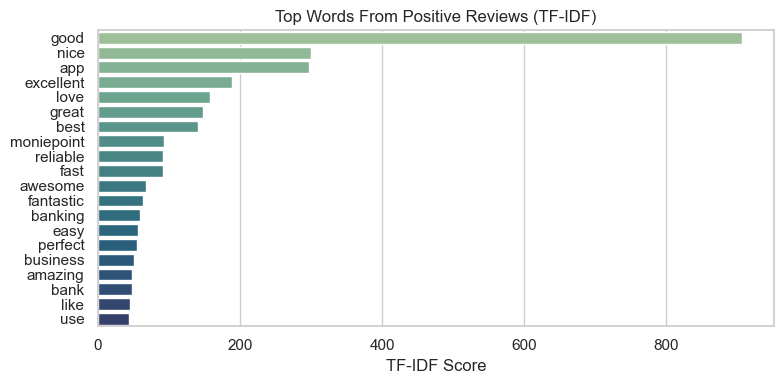

C:\Users\user11\AppData\Local\Temp\ipykernel_19060\2902830085.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(scores), y=list(words), palette='crest')


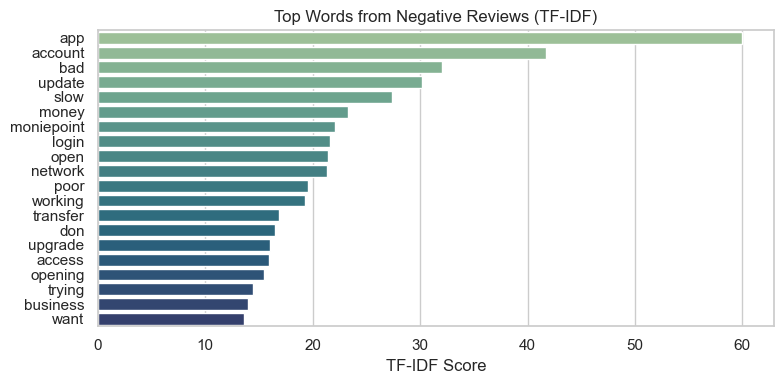

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_tfidf_words(word_scores, title):
    words, scores = zip(*word_scores)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(scores), y=list(words), palette='crest')
    plt.title(title)
    plt.xlabel('TF-IDF Score')
    plt.tight_layout()
    plt.show()

plot_tfidf_words(top_pos_tfidf, 'Top Words From Positive Reviews (TF-IDF)')
plot_tfidf_words(top_neg_tfidf, 'Top Words from Negative Reviews (TF-IDF)')


In [106]:
# Show full column content in notebook output
pd.set_option('display.max_colwidth', None)

# Optionally, show more rows if needed
pd.set_option('display.max_rows', 100)


In [ ]:
# Keyword Impact 
# Example to get counts per keyword per sentiment
import pandas as pd

# Sample loop if your keywords are stored in a list
keywords = ["money", "login", "network","account", "bad", "update", "slow"]
rows = []

for kw in keywords:
    df_kw = df[df['content'].str.contains(kw, case=False, na=False)]
    total = len(df_kw)
    pos = len(df_kw[df_kw['sentiment_label'] == 'positive'])
    neu = len(df_kw[df_kw['sentiment_label'] == 'neutral'])
    neg = len(df_kw[df_kw['sentiment_label'] == 'negative'])

    rows.append({
        'keyword': kw,
        'positive_%': pos / total * 100 if total else 0,
        'neutral_%': neu / total * 100 if total else 0,
        'negative_%': neg / total * 100 if total else 0,
        'count': total
    })

sentiment_by_keyword = pd.DataFrame(rows)
print(sentiment_by_keyword)


   keyword  positive_%  neutral_%  negative_%  count
0    money   30.978261   7.065217   61.956522    184
1    login    6.976744   5.813953   87.209302     86
2  network   54.477612   9.701493   35.820896    134
3  account   21.722846   7.490637   70.786517    267
4      bad    5.194805  19.480519   75.324675     77
5   update   15.476190  17.261905   67.261905    168
6     slow    4.761905  15.476190   79.761905     84


C:\Users\user11\AppData\Local\Temp\ipykernel_19060\408836168.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='bigram', data=top_bigrams, palette='Reds_r')


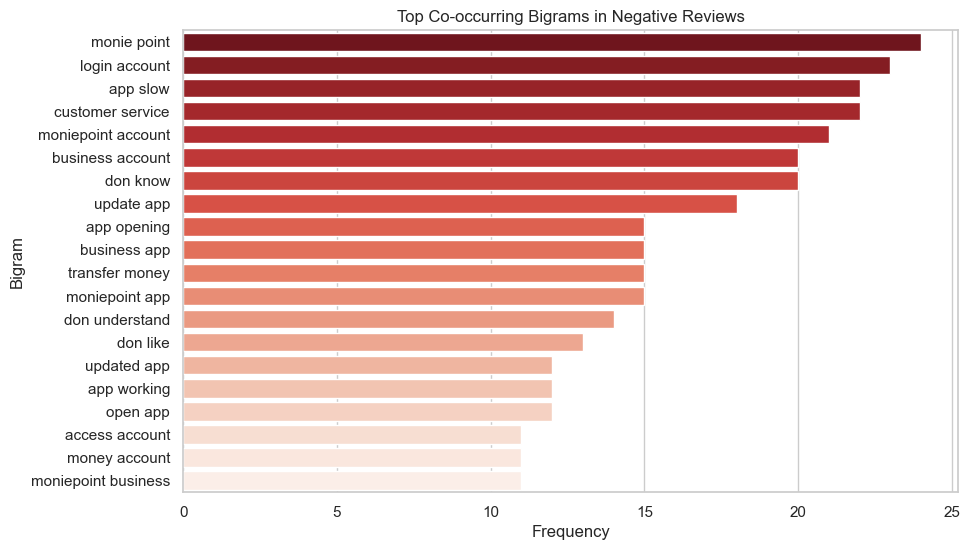

In [ ]:
# keyword coerrence


from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter negative reviews
negative_reviews = df[df['sentiment_label'] == 'negative']['content'].dropna()

# Step 2: Create bigram count vectorizer
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform(negative_reviews)

# Step 3: Get top co-occurring bigrams
bigram_counts = pd.DataFrame({
    'bigram': vectorizer.get_feature_names_out(),
    'count': X.toarray().sum(axis=0)
})
top_bigrams = bigram_counts.sort_values(by='count', ascending=False).head(20)

# Step 4: Plot
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='bigram', data=top_bigrams, palette='Reds_r')
plt.title("Top Co-occurring Bigrams in Negative Reviews")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


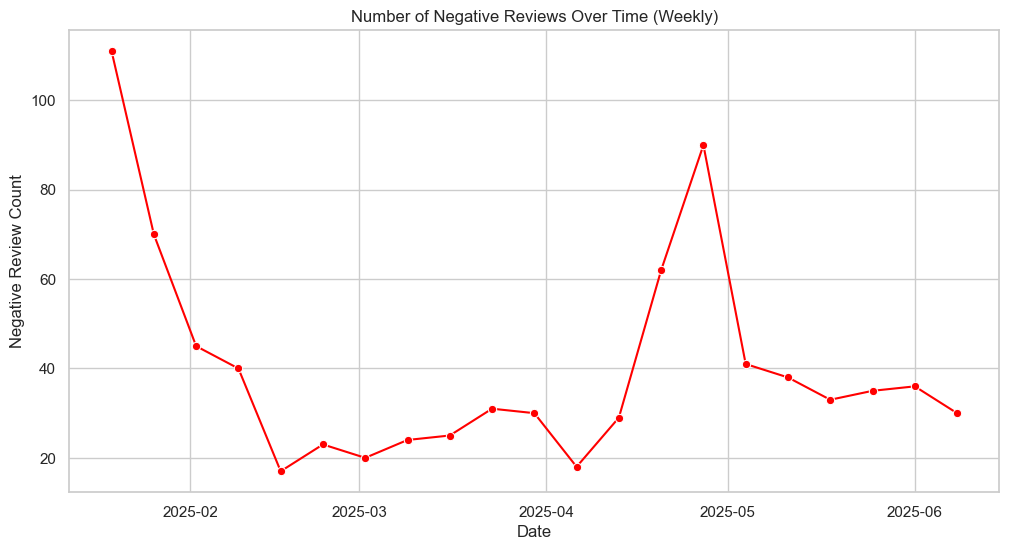

In [117]:
# Filter for negative
negative_df = df[df['sentiment_label'] == 'negative']
neg_count = negative_df.groupby(pd.Grouper(key='date', freq='W'))['content'].count().reset_index(name='negative_count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='negative_count', data=neg_count, color='red', marker='o')
plt.title('Number of Negative Reviews Over Time (Weekly)')
plt.xlabel('Date')
plt.ylabel('Negative Review Count')
plt.grid(True)
plt.show()


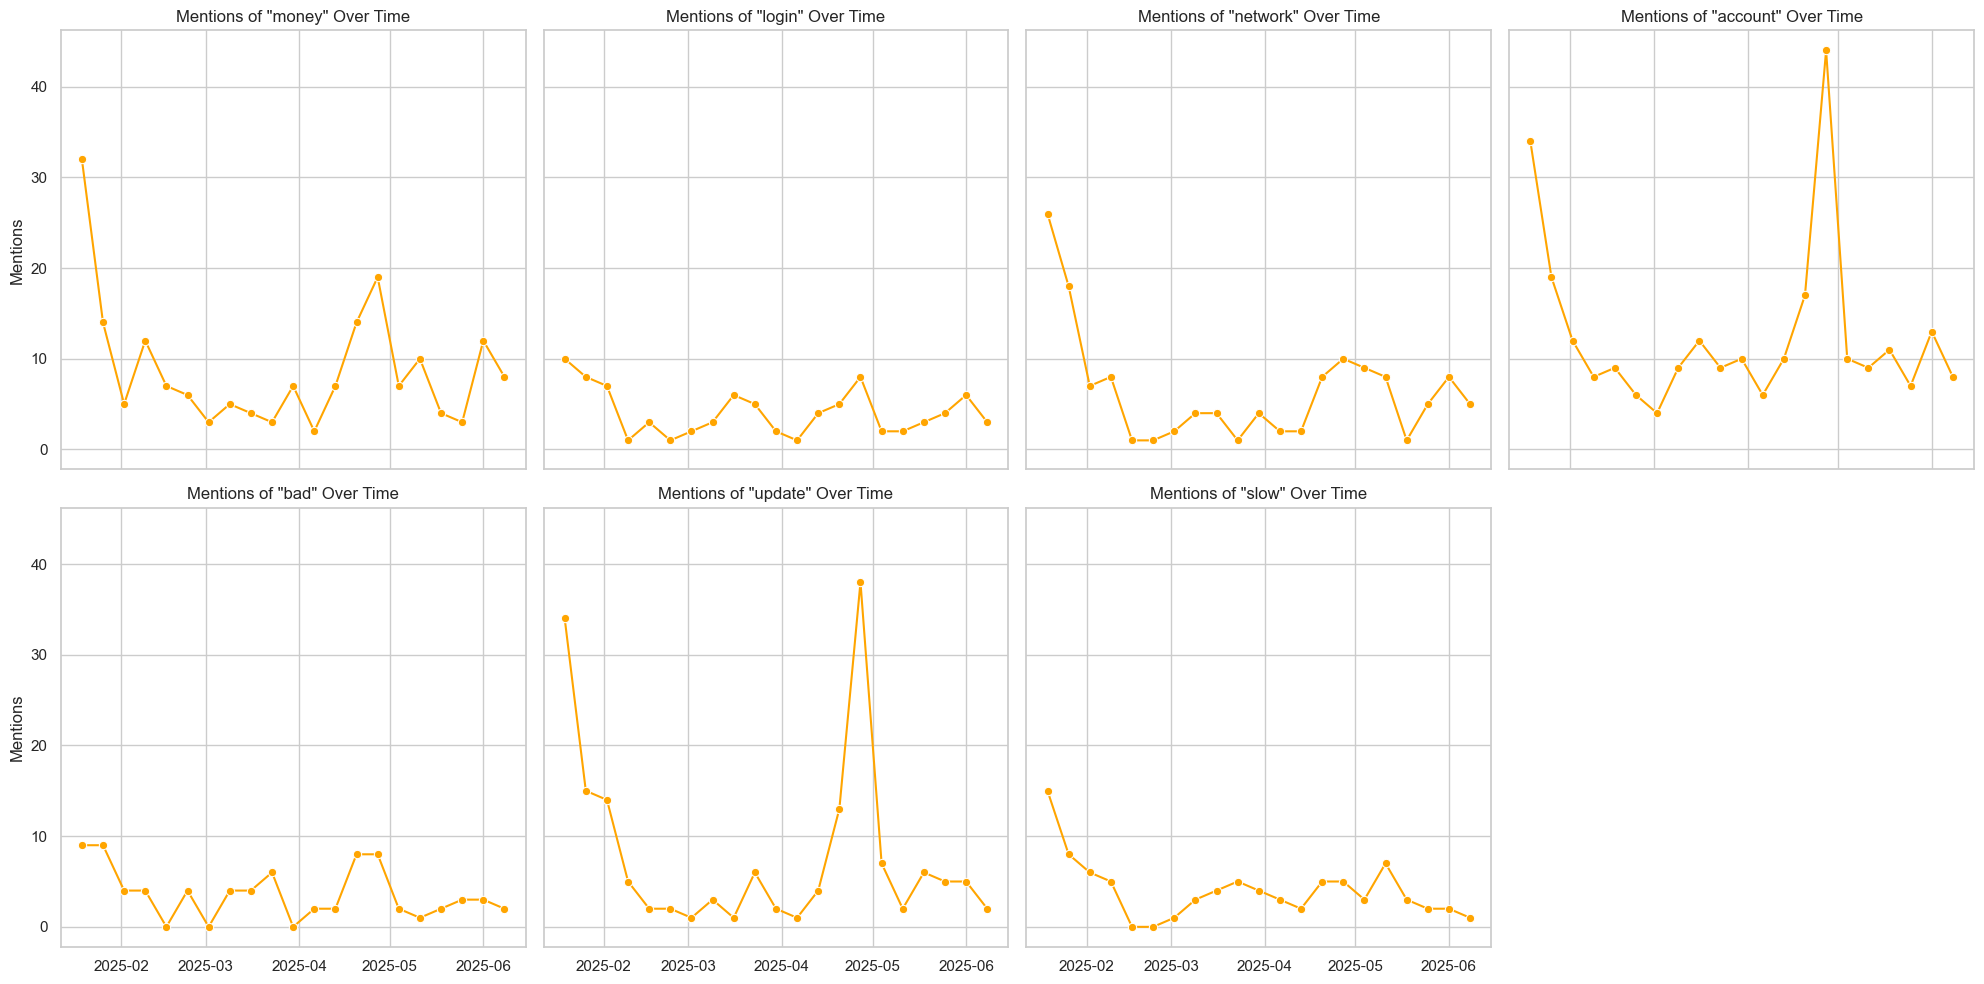

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'date' column is datetime
df['date'] = pd.to_datetime(df['date'])

# Keywords to track
keywords = ["money", "login", "network", "account", "bad", "update", "slow"]

# Set up subplot grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, keyword in enumerate(keywords):
    # Create boolean column for mentions
    df[f'mention_{keyword}'] = df['content'].str.contains(keyword, case=False, na=False)

    # Group by week and count mentions
    trend = (
        df[df[f'mention_{keyword}']]
        .groupby(pd.Grouper(key='date', freq='W'))['content']
        .count()
        .reset_index(name='mentions')
    )

    # Plot
    sns.lineplot(data=trend, x='date', y='mentions', marker='o', ax=axes[i], color='orange')
    axes[i].set_title(f'Mentions of "{keyword}" Over Time')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Mentions')
    axes[i].grid(True)

# Remove empty subplot (if any)
if len(keywords) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()
